## Drag Polar estimation through Drag Build-up method

The dcl/dalpha slope is 0.029488143147638743
1.0988 37.862434412998496
The leading edge sweep is: 21.19571251545713
The leading edge sweep is: 21.19571251545713
The lower limit AR for High AR DATCOM method is: 2.8601536001811767
The leading edge sweep is: 21.19571251545713
The CL_max is: 1.0988
37.862434412998496


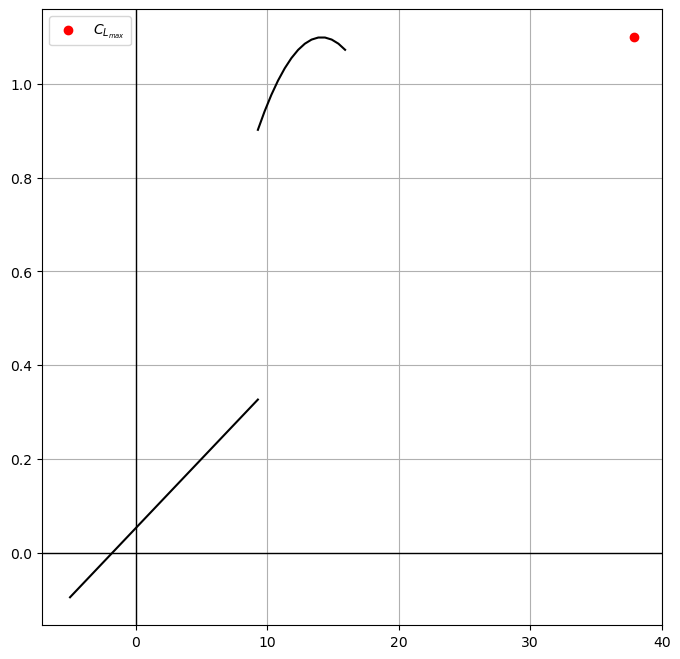

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ambiance import Atmosphere
from task2v2 import *

In [2]:
# Variables
kn_factor = .5144444
ft_factor = 3.281
MTOW = 43090 #kg
OEW = 24593 #kg
fuel_weight = 8832 #kg
b = 28.08
S = 93.5
c4_sweep = np.radians(17.45)
tr = 0.235
L_fus = 35.50 #m
d_fus = 3.30 # m
V_app = 128/kn_factor # knots
h_app = 0
V_cr = 430*kn_factor  # knots
h_cruise = 30000 / ft_factor # ft


### Parasite drag estimation

Here we need to consider only for the contribution of the wing and of the fuselage. 

In [3]:
# Do not consider miscleanous drag
C_dmisc = 0

In [32]:
# Cruise parameters
print(h_cruise)
atmosphere = Atmosphere(h_cruise)
kin_visc = atmosphere.kinematic_viscosity
dyn_visc = atmosphere.dynamic_viscosity
rho = atmosphere.density

a = atmosphere.speed_of_sound
M = V_cr/a[0]
kin_visc, dyn_visc, rho, a

9143.553794574824


(array([3.24052118e-05]),
 array([1.48761059e-05]),
 array([0.45906523]),
 array([303.23206615]))

### Fuselage component

In [5]:
# 0.05% of the fuselage is laminar
laminar_fus = 0.05
c = 3.755
k = 0.634e-5
Re = V_cr * L_fus/kin_visc
#V_cr*c/kin_visc

# Laminar friction coefficient
C_f_lamFus = 1.328/np.sqrt(Re)

# Turbolent friction coefficient
C_f_turbFus = 0.455/((np.log10(Re)**(2.58))*(1+0.144*M**2)**0.65)

# Total friction coefficient weighted
C_fFus = laminar_fus * C_f_lamFus + (1-laminar_fus) * C_f_turbFus
Re
print(C_f_lamFus, C_f_turbFus, 1.328/np.sqrt(Re), C_fFus)

[8.53076308e-05] [0.00179724] [8.53076308e-05] [0.00171164]


In [6]:
f_fus = L_fus/np.sqrt(d_fus**2)
FF_fus = (1+ 60/f_fus**3 + f_fus/ 400)
FF_fus, f_fus

(1.0750896081495798, 10.757575757575758)

#### Interference factor

In [7]:
IF_fus = 1.0

#### Wet area

In [8]:
L1_fus = 1.99978
L2_fus = 28.44
L3_fus = 5.06

S_wet_fus = (np.pi * d_fus / 4) * ((1 / (3 * L1_fus**2)) * ((4 * L1_fus**2 + d_fus**2 / 4)**1.5 - d_fus**3 / 8)) - d_fus + 4 * L2_fus + 2 * np.sqrt(L3_fus**2 + d_fus**2 / 4)

S_wet_fus

137.6301171676473

### Wing component

In [9]:
c = 3.755

In [10]:
def angle_at_xdivc(x, c, LEsweep, c_r, tr, b):
    return np.arctan(np.tan(LEsweep) - (x/c)  * 2 * (c_r/b) * (1-tr))

In [11]:
laminar_wing = 0.1
# NACA 64(1)-212
x_c_m = 0.4
ttoc = 0.12
print(LE_sweep)
lambda_m  = angle_at_xdivc(4, 10, np.radians(LE_sweep), c_r, tr, b)

print(np.degrees(lambda_m), lambda_m)
k = 0.634e-5 # paint factor
Re = 2.56e7#V_cr*c/kin_visc

# Laminar friction coefficient
C_f_lamwing = 1.328/np.sqrt(Re)

# Turbolent friction coefficient
C_f_turbwing = 0.455/((np.log10(Re)**(2.58))*(1+0.144*M**2)**0.65)

# Total friction coefficient weighted
C_fwing = laminar_wing * C_f_lamwing + (1-laminar_wing) * C_f_turbwing
C_f_lamwing, C_f_turbwing, C_fwing

21.19571251545713
15.124014377256355 0.2639638470020832


(0.0002624690457939755, 0.002473444218208737, 0.002252346700967261)

#### Form factor

In [12]:
FF_wing = (1+ (0.6 / x_c_m) * ttoc + 100*ttoc**4)*(1.34*M**0.18*np.cos(lambda_m)**0.28)
FF_wing, np.degrees(lambda_m)

(1.5052598463243316, 15.124014377256355)

#### Interference factor

In [13]:
IF_wing = 1.4 # 1.1 - 1.4

#### S_{wet}

In [14]:
S_wet_wing = 2*1.07*S
S_wet_wing

200.09

## Wave drag

### Final form drag estimation

In [29]:
q = 0.5*rho*V_cr**2
C_Ldes = 1.1*(1/q)*((MTOW + (MTOW-fuel_weight))/2)*9.81*1/S


M_DD = 0.87/(math.cos(c4_sweep)) - (0.12)/((math.cos(c4_sweep)**2)) - C_Ldes/(10*((math.cos(c4_sweep)**3)))
#M_DD = 0.87/(math.cos(np.radians(LE_sweep))) - (0.12)/((math.cos(np.radians(LE_sweep))**2)) - C_Ldes/(10*((math.cos(np.radians(LE_sweep))**3)))

M_DD, M, LE_sweep, C_Ldes

(array([0.73434119]),
 0.7295108819052281,
 21.19571251545713,
 array([0.39738455]))

In [30]:

DeltaCD = 0.002*(1+2.5*(M_DD-M)/0.05)**(-1)
DeltaCD, M

(array([0.00161093]), 0.7295108819052281)

In [31]:
CD_0 = (1/S)*(FF_fus*IF_fus*C_fFus*S_wet_fus+C_fwing*FF_wing*IF_wing*S_wet_wing) + DeltaCD
print(f"CD0 of the fuselafe and the aircraft without any compressibility effects and miscellaneuous drag is: {np.round(CD_0, 7)}")

CD0 of the fuselafe and the aircraft without any compressibility effects and miscellaneuous drag is: [0.0144772]


In [18]:
e = 4.61 * (1 - 0.045 * AR**0.68) * (np.cos((LE_sweep))**0.15) - 3.1
e

C:\Users\feder\AppData\Local\Temp\ipykernel_16128\2684853951.py:1: RuntimeWarning: invalid value encountered in scalar power
  e = 4.61 * (1 - 0.045 * AR**0.68) * (np.cos((LE_sweep))**0.15) - 3.1


nan

In [19]:
import numpy as np
from scipy.optimize import fsolve

def equation(M_cr, Cp_0, gamma):
    # The equation corresponds to the image provided
    left_hand_side = Cp_0 / np.sqrt(1 - M_cr**2)
    right_hand_side = (2 / (gamma * M_cr**2)) * \
                      (((2 + (gamma - 1) * M_cr**2) / (gamma + 1))**(gamma / (gamma - 1)) - 1)
    return left_hand_side - right_hand_side

def solve_M_cr(Cp_0, gamma, M_cr_guess=0.8):
    # Solve for M_cr using fsolve with an initial guess for M_cr
    M_cr_solution = fsolve(equation, M_cr_guess, args=(Cp_0, gamma))
    return M_cr_solution[0]

# Example values for Cp_0 and gamma
Cp_0 = -0.5  # Example value of Cp_0
gamma = 1.4  # Ratio of specific heats (for air, gamma is typically 1.4)

# Solve for M_cr
M_cr = solve_M_cr(Cp_0, gamma)
print(f"The critical Mach number (M_cr) is: {M_cr:.4f}")


The critical Mach number (M_cr) is: 0.7157


-0.7159140717820883


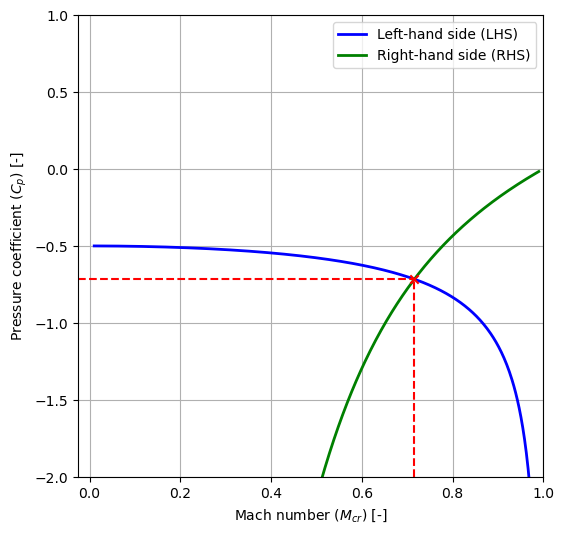

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the left-hand side of the equation
def lhs(M_cr, Cp_0):
    return Cp_0 / np.sqrt(1 - M_cr**2)

# Define the right-hand side of the equation
def rhs(M_cr, gamma):
    return (2 / (gamma * M_cr**2)) * \
           (((2 + (gamma - 1) * M_cr**2) / (gamma + 1))**(gamma / (gamma - 1)) - 1)

# Parameters
Cp_0 = -0.5   # Example value for Cp_0
gamma = 1.4  # Ratio of specific heats (for air)

# Generate Mach number values from 0.01 to 0.99 (to avoid division by zero at M = 1)
M_cr_values = np.linspace(0.01, 0.99, 500)
print(lhs(0.7157, -0.5))
# Compute the left-hand side and right-hand side for each M_cr
lhs_values = lhs(M_cr_values, Cp_0)
rhs_values = rhs(M_cr_values, gamma)

# Plotting the two functions
plt.figure(figsize=(6, 6))
plt.plot(M_cr_values, lhs_values, label='Left-hand side (LHS)', color='blue', linewidth=2)
plt.plot(M_cr_values, rhs_values, label='Right-hand side (RHS)', color='green', linewidth=2)
plt.xlabel(r'Mach number ($M_{cr}$) [-]')
plt.ylabel(r'Pressure coefficient $(C_p)$ [-]')
plt.plot((0.7157, 0.7157), (-2, -0.7159140717820883), color = 'red', linestyle='--')
plt.plot((-0.025, 0.7157), (-0.7159140717820883, -0.7159140717820883), color = 'red', linestyle='--')

plt.scatter(0.7157, -0.7159140717820883, marker='x', color='red', zorder = 999)
plt.ylim(-2, 1)
plt.xlim(-0.025, 1)
#plt.title('Comparison of LHS and RHS as Functions of Mach Number (M_cr)', fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig('mcr.svg')
plt.show()


In [43]:
import numpy as np

# Define the right-hand side of the equation
def rhs(M_cr, gamma):
    return (2 / (gamma * M_cr**2)) * \
           (((2 + (gamma - 1) * M_cr**2) / (gamma + 1))**(gamma / (gamma - 1)) - 1)

# Parameters
M_cr = 0.7157  # Given M_cr
gamma = 1.4    # Ratio of specific heats (for air)

# Compute the right-hand side value
rhs_value = rhs(M_cr, gamma)

# Compute Cp_0 using the equation
Cp_0 = rhs_value * np.sqrt(1 - M_cr**2)

print(f"The value of Cp_0 for M_cr = {M_cr} is: {Cp_0:.4f}")


The value of Cp_0 for M_cr = 0.7157 is: -0.5002
